In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load dataset
df = pd.read_csv('Embedded_system.csv')

# Preview
print(df.head())
print(df.info())

   packet_size  inter_arrival_time  src_port  dst_port  packet_count_5s  \
0     0.405154            0.620362     62569       443         0.857143   
1     0.527559            0.741288     59382       443         0.785714   
2     0.226199            0.485116     65484        80         0.285714   
3     0.573372            0.450965     51707        53         0.142857   
4     0.651396            0.888740     26915        53         0.714286   

   mean_packet_size  spectral_entropy  frequency_band_energy  label  \
0               0.0          0.834066               0.534891    0.0   
1               0.0          0.147196               0.990757    0.0   
2               0.0          0.855192               0.031781    0.0   
3               0.0          0.153220               0.169958    0.0   
4               0.0          0.923916               0.552053    0.0   

   protocol_type_TCP  protocol_type_UDP  src_ip_192.168.1.2  \
0              False               True                True

In [3]:
numeric_cols = df.select_dtypes(include=np.number).columns
print(numeric_cols)

Index(['packet_size', 'inter_arrival_time', 'src_port', 'dst_port',
       'packet_count_5s', 'mean_packet_size', 'spectral_entropy',
       'frequency_band_energy', 'label'],
      dtype='object')


In [4]:
features = df[numeric_cols[:4]].copy()   # selects first 4 numeric columns

In [6]:
features = df[['packet_size',
               'inter_arrival_time',
               'packet_count_5s',
               'spectral_entropy']].copy()

In [7]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    max_samples=256,
    random_state=42
)

model.fit(features)

features['anomaly'] = model.predict(features)

print(features['anomaly'].value_counts())

anomaly
 1    990
-1     10
Name: count, dtype: int64


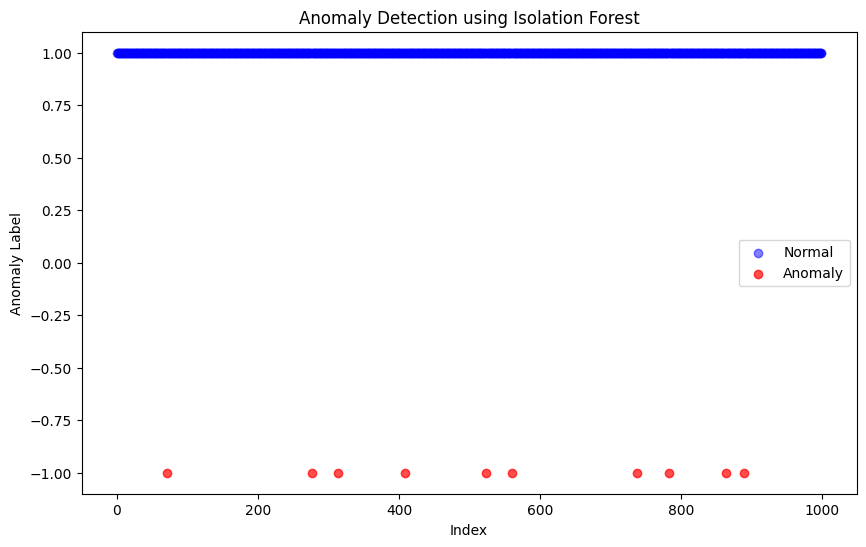

In [8]:
plt.figure(figsize=(10,6))

normal_data = features[features['anomaly'] == 1]
anomalies = features[features['anomaly'] == -1]

plt.scatter(normal_data.index, normal_data['anomaly'],
            color='blue', label='Normal', alpha=0.5)

plt.scatter(anomalies.index, anomalies['anomaly'],
            color='red', label='Anomaly', alpha=0.7)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

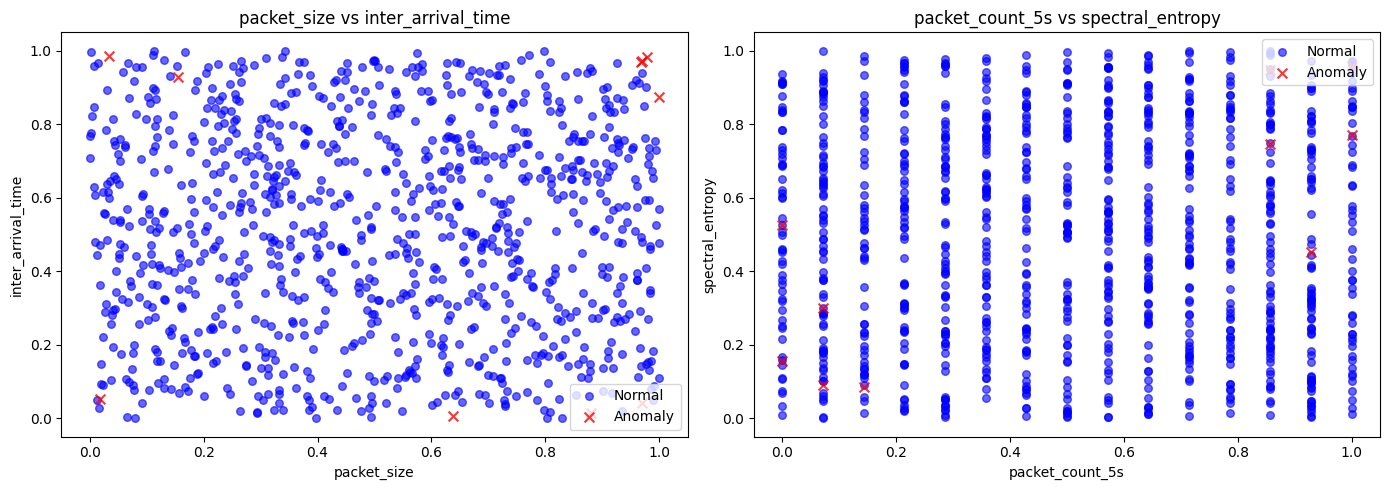

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

col1, col2, col3, col4 = features.columns[:4]

normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# Plot 1
axes[0].scatter(normal[col1], normal[col2],
                color='blue', alpha=0.6, s=30, label='Normal')
axes[0].scatter(anomaly[col1], anomaly[col2],
                color='red', alpha=0.8, s=50, marker='x', label='Anomaly')
axes[0].set_xlabel(col1)
axes[0].set_ylabel(col2)
axes[0].set_title(f'{col1} vs {col2}')
axes[0].legend()

# Plot 2
axes[1].scatter(normal[col3], normal[col4],
                color='blue', alpha=0.6, s=30, label='Normal')
axes[1].scatter(anomaly[col3], anomaly[col4],
                color='red', alpha=0.8, s=50, marker='x', label='Anomaly')
axes[1].set_xlabel(col3)
axes[1].set_ylabel(col4)
axes[1].set_title(f'{col3} vs {col4}')
axes[1].legend()

plt.tight_layout()
plt.show()

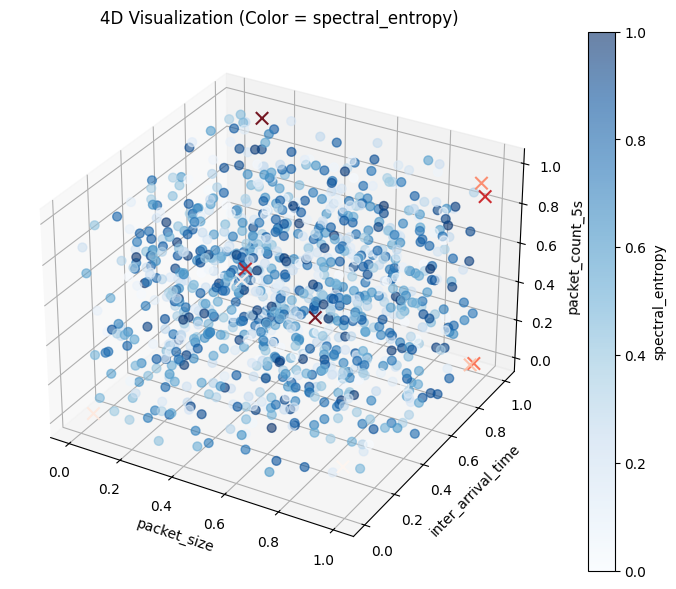

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc1 = ax.scatter(
    normal[col1],
    normal[col2],
    normal[col3],
    c=normal[col4],
    cmap='Blues',
    alpha=0.6,
    s=40
)

ax.scatter(
    anomaly[col1],
    anomaly[col2],
    anomaly[col3],
    c=anomaly[col4],
    cmap='Reds',
    alpha=0.9,
    s=80,
    marker='x'
)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.set_zlabel(col3)
ax.set_title(f'4D Visualization (Color = {col4})')

plt.colorbar(sc1, label=col4)
plt.show()

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=normal[col1],
    y=normal[col2],
    z=normal[col3],
    mode='markers',
    name='Normal',
    marker=dict(
        size=6,
        color=normal[col4],
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title=col4)
    )
))

fig.add_trace(go.Scatter3d(
    x=anomaly[col1],
    y=anomaly[col2],
    z=anomaly[col3],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=8,
        color=anomaly[col4],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))

fig.update_layout(
    title=f'4D Scatter Plot (Color = {col4})',
    scene=dict(
        xaxis_title=col1,
        yaxis_title=col2,
        zaxis_title=col3
    ),
    width=900,
    height=700
)

fig.show()